In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM

In [2]:
path = 'data/preprocessed'
file_name = 'preproc'
df = pd.read_csv(f'../{path}/{file_name}.csv')
df.head(3)

,mmsi,date,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,type_drifting_longlines,type_fixed_gear,type_pole_and_line,type_purse_seines,type_trawlers,type_trollers,type_unknown,year,month,day_of_week,utc_offset
0,1.252340e+12,2015-01-01 05:08:23,0.0,0.0,0.0,128.0,52.458717,4.581316,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3,-4.0
1,1.252340e+12,2015-01-01 05:20:34,0.0,0.0,0.0,128.0,52.458733,4.581316,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3,-4.0
2,1.252340e+12,2015-01-01 05:32:53,0.0,0.0,0.0,128.0,52.458698,4.581267,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015,1,3,-4.0


In [3]:
df = df.dropna()

In [4]:
zero = df[df['is_fishing']==0]
zero.shape

(300765, 20)

In [5]:
sample_size = 50000
start_index = 0
# Create a smaller sequential subset
data = zero.iloc[start_index:start_index+sample_size]
data.shape

(50000, 20)

In [6]:
# Defining X - features
X = data.drop(['date', 'year', 'is_fishing'], axis=1)
X.head(3)

,mmsi,distance_from_shore,distance_from_port,speed,course,lat,lon,type_drifting_longlines,type_fixed_gear,type_pole_and_line,type_purse_seines,type_trawlers,type_trollers,type_unknown,month,day_of_week,utc_offset
0,1.252340e+12,0.0,0.0,0.0,128.0,52.458717,4.581316,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3,-4.0
1,1.252340e+12,0.0,0.0,0.0,128.0,52.458733,4.581316,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3,-4.0
2,1.252340e+12,0.0,0.0,0.0,128.0,52.458698,4.581267,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,3,-4.0


In [7]:
svm = OneClassSVM(kernel='rbf')
svm.fit(X)
pred = svm.predict(X)

In [8]:
np.unique(pred)

array([-1,  1])

In [9]:
from numpy import quantile, where, random
anom_index = where(pred == 1)

In [10]:
anom_index[0]

array([ 9690,  9691,  9692, ..., 38722, 38723, 38724])

In [11]:
values = X.iloc[anom_index]

In [12]:
values.head()

,mmsi,distance_from_shore,distance_from_port,speed,course,lat,lon,type_drifting_longlines,type_fixed_gear,type_pole_and_line,type_purse_seines,type_trawlers,type_trollers,type_unknown,month,day_of_week,utc_offset
10496,5.110130e+13,0.0,28634.939453,0.0,280.000000,52.933998,5.037405,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,4,-4.0
10497,5.110130e+13,0.0,28634.939453,0.0,83.000000,52.933994,5.037403,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,4,-4.0
10498,5.110130e+13,0.0,28634.939453,0.0,259.299988,52.934006,5.037402,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,4,-4.0
10499,5.110130e+13,0.0,28634.939453,0.0,265.600006,52.933990,5.037400,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,4,-4.0
10500,5.110130e+13,0.0,28634.939453,0.0,290.399994,52.933998,5.037403,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,4,-4.0


In [35]:
boat = X['mmsi'].iloc[5000]
one_boat = X.loc[X['mmsi']== boat]
lat_lon = one_boat[['lat', 'lon']]
lat_lon.head()

,lat,lon
3482,60.369865,-0.685165
3483,60.355213,-0.714212
3484,60.341675,-0.744257
3485,60.326347,-0.777452
3486,60.309814,-0.808290


In [47]:
boat = values['mmsi'].iloc[5000]
one_boat = values.loc[values['mmsi']== boat]
lat_lon = one_boat[['lat', 'lon']]
lat_lon.head()

,lat,lon
14083,58.164421,-0.953675
14084,58.181213,-1.028832
14085,58.207546,-1.144830
14086,58.240028,-1.293835
14087,58.255795,-1.372568


In [48]:
boat_values = values.loc[values['mmsi']== boat]

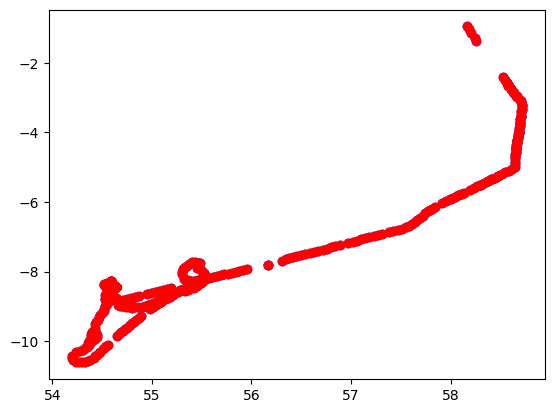

In [49]:
plt.scatter(one_boat['lat'],one_boat['lon'], color='b')
plt.scatter(boat_values['lat'], boat_values['lon'], color='r')
plt.show()

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [39]:
geometry = [Point(xy) for xy in zip(one_boat['lon'], one_boat['lat'])]

In [40]:
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(one_boat, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

/Users/grace/.pyenv/versions/3.10.6/envs/fishing_classification/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,mmsi,distance_from_shore,distance_from_port,speed,course,lat,lon,type_drifting_longlines,type_fixed_gear,type_pole_and_line,type_purse_seines,type_trawlers,type_trollers,type_unknown,month,day_of_week,utc_offset,geometry
3482,5.145483e+12,12082.749023,71447.523438,5.8,221.399994,60.369865,-0.685165,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2,-4.0,POINT (-0.68516 60.36987)
3483,5.145483e+12,13453.293945,67206.984375,6.3,225.800003,60.355213,-0.714212,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2,-4.0,POINT (-0.71421 60.35521)
3484,5.145483e+12,11999.705078,62966.703125,6.1,231.899994,60.341675,-0.744257,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2,-4.0,POINT (-0.74426 60.34167)
3485,5.145483e+12,8246.008789,57998.578125,6.2,228.100006,60.326347,-0.777452,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2,-4.0,POINT (-0.77745 60.32635)
3486,5.145483e+12,8602.114258,52401.003906,6.1,222.699997,60.309814,-0.808290,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2,-4.0,POINT (-0.80829 60.30981)


/var/folders/jp/3hlxbh4x1mb0k2qwf5fmzyp80000gp/T/ipykernel_29870/3434163748.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
/var/folders/jp/3hlxbh4x1mb0k2qwf5fmzyp80000gp/T/ipykernel_29870/3434163748.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, cmap='autumn')


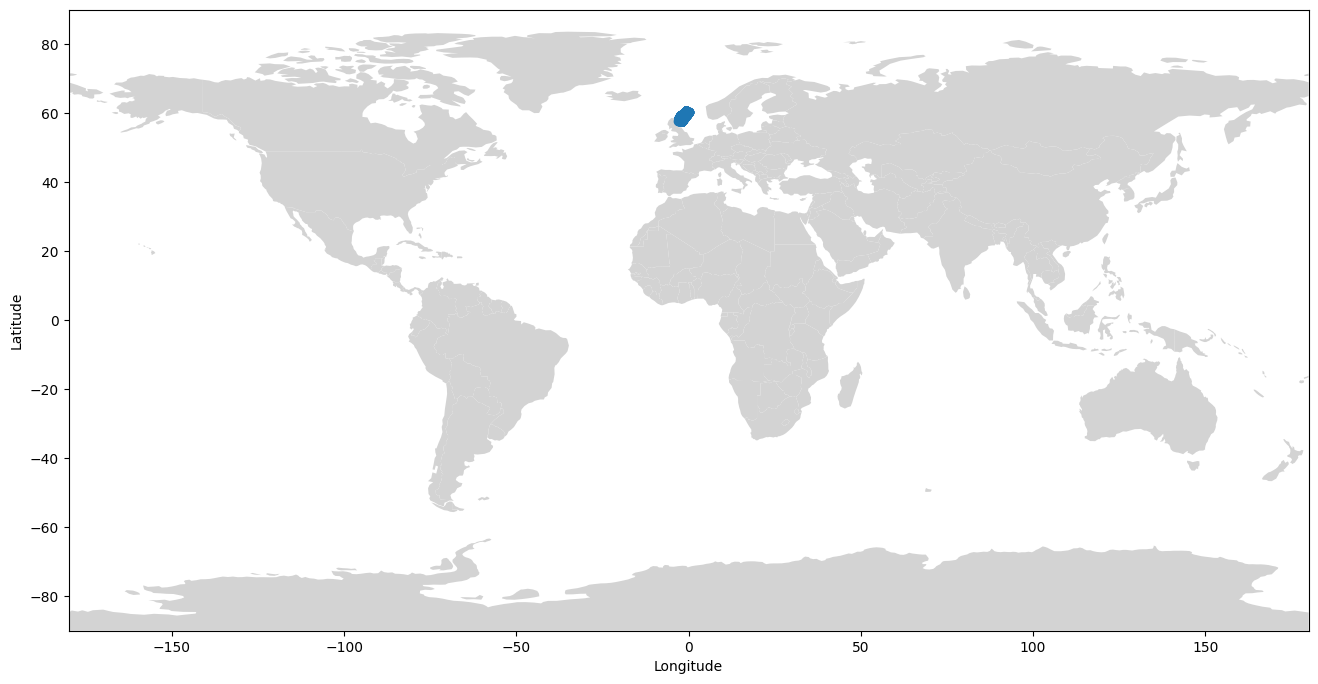

In [41]:
# Getting world map data from geo pandas
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting Longitudes and Latitudes of one boat
x = one_boat['lon']
y = one_boat['lat']
plt.scatter(x, y, cmap='autumn')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()